In [ ]:
For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

* loaded 'negativeOpinionWords.txt' file and converted to list 'negative_list'
* loaded 'positiveOpinionWords.txt' file and converted to list 'positive_list'
* loaded 'stop.txt' file and coverted to list 'stopwordseries'
* loaded dataset of elon musk tweets
* there are 1999 observations and 2 features
* dropped index columns
* Removed urls, <u+33sfesgds>,newline characters,digits, punctuation marks from the text column using regex
* replaced #, *, @, &amp; with blank spaces
* used lower, strip function on data
* removed the empty rows after data cleaning coz some rows had only urls
* there were 1975 observations after data cleaning
* now converted the table into list of sentences

* LOGIC IMPLEMENTED

* iterating through each sentence of the tweet list
*    - converted each sentence into tokens
*    - applied stopword list to tokens and filtered the stopwords
*    - Now called the user-defined functin 'sentimentanalysis' for each filtered sentence
*    - sentimentanalysis function logic
*    - checks for presence of positive words in the sentence and sets the positivecounter, positive word list
*    - checks for presence of negative words in the sentence and sets the negativecounter, negative word list

*    - if  positivecounter > negativecounter     -- sentiment(opinion) -- positive
*          negativecounter > positivecounter     -- sentiment(opinion) -- negative
*          negativecounter = positivecounter     -- sentiment(opinion) -- neutral
*          negativecounter = positivecounter = 0 -- sentiment(opinion) -- neutral

* Printed a table with opinion, opinion value, wordcount & so on
            
*            opinion -- positive -- opinion value = 1
*            opinion -- negative -- opinion value = -1
*            opinion -- neutral  -- opinion value = 0
        

In [1]:
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import re
import spacy # language models
import sys
from datetime import datetime
import string

from nltk import tokenize
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
negative_ds = pd.read_csv('negativeOpinionWords.txt', skiprows= 34, header=None, names= ['negative'])
print(negative_ds.head())

negative_list = negative_ds['negative'].to_list()
negative_list[:15]

     negative
0     2-faced
1     2-faces
2    abnormal
3     abolish
4  abominable


['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly']

In [3]:
positive_ds = pd.read_csv('positiveOpinionWords.txt', skiprows= 35, header=None, names= ['positive'])
print(positive_ds.head())

positive_list = positive_ds['positive'].to_list()
positive_list[:15]

    positive
0         a+
1     abound
2    abounds
3  abundance
4   abundant


['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish']

In [4]:
# reading stop word file
stopword_ds = pd.read_csv('stop.txt', header=None, names=['stopwords'])
stopwordseries = stopword_ds['stopwords'].to_list()
stopwordseries[:20]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along']

In [2]:
ds  = pd.read_csv('Elon_musk.csv', error_bad_lines=False)
ds

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Data Cleaning

In [6]:
ds = ds.drop( ['Unnamed: 0'], axis=1)
ds

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
#sub means substring
#searches for the pattern in the string and replaces it

# removes urls
def remove_urls(input_str):
    #return re.sub(r'https://\D+/\w+', '',input_str)
    return re.sub(r'https://\D+/\w+', '',input_str)
    
# removes <u+09wertout>
def remove_greaterthansign(input_str):
    return re.sub(r'<u\+\w+>', '',input_str)    

def remove_digits(input_str):
    return re.sub(r'\d+','',input_str)

#\n\n,\n2,\n3\,\n
def remove_newline(input_str):
    return re.sub(r'\n\d*', '', input_str)

#removes ?,.-_! so on 14 chars in total
def remove_punctuation(input_str):
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct)*' ')
    return input_str.translate(trantab)

ds.Text = ds.Text.apply(remove_urls)
ds.Text = ds.Text.apply(remove_greaterthansign)
ds.Text = ds.Text.apply(remove_digits)
ds.Text = ds.Text.apply(remove_punctuation)
ds.Text = ds.Text.apply(remove_newline)


ds.Text = ds.Text.replace('#','')
ds.Text = ds.Text.replace('*','')
ds.Text = ds.Text.replace('@','')
ds.Text = ds.Text.replace('&amp;','')

ds

,Text
0,kunalb I�m an alien
1,ID AA Carmack Ray tracing on Cyberpunk with H...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazi...
...,...
1994,flcnhvy True it sounds so surreal but the n...
1995,PPathole Make sure to read ur terms amp con...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is U F U F


In [8]:
ds = [x.strip() for x in ds.Text]  #text column is converted to a list
ds = [x.lower() for x in ds] # to small letters
ds = [x for x in ds if x ] # removes empty rows

In [9]:
print(len(ds))
ds[:50]

1975


['kunalb i�m an alien',
 'id aa carmack ray tracing on cyberpunk with hdr is next level  have you tried it',
 'joerogan  spotify great interview',
 'gtera doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year  now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge all thought he would fail himself most of all',
 'owensparks   flcnhvy  anonyx haha thanks',
 'flcnhvy  anonyx indeed  tweets definitely do not represent real world time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with  kanyewest',
 'geoffkeighley  unrealengine it�s getting real',
 'bought some dogecoin for lil x  so he can be a toddler hodler',
 'joshmanmode he definitely has issues  but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy  u f  u f',
 'this is true power haha',
 'freewalletorg an

In [10]:
ds[:-50]

['kunalb i�m an alien',
 'id aa carmack ray tracing on cyberpunk with hdr is next level  have you tried it',
 'joerogan  spotify great interview',
 'gtera doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year  now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge all thought he would fail himself most of all',
 'owensparks   flcnhvy  anonyx haha thanks',
 'flcnhvy  anonyx indeed  tweets definitely do not represent real world time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with  kanyewest',
 'geoffkeighley  unrealengine it�s getting real',
 'bought some dogecoin for lil x  so he can be a toddler hodler',
 'joshmanmode he definitely has issues  but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy  u f  u f',
 'this is true power haha',
 'freewalletorg an

In [11]:
def sentimentanalysis_ds(pos_list, neg_list, sentence):
    #print(sentence)
    #sys.exit()
    positive_words = []
    negative_words = []
    negativeCounter = 0
    positiveCounter = 0
    setimentVal = 'Neutral'
    wordCount = 0
    for item1 in sentence:
        wordCount +=1 
        #print("inside for loop each item1 =", item1)
        if item1 in pos_list:
            positive_words.append(item1)
            positiveCounter += 1 
            #print('positive')
            #exit()
        if item1 in neg_list:
            negative_words.append(item1)
            negativeCounter += 1 
            #print('negative')
    
    if negativeCounter > positiveCounter:
        setimentVal = 'Negative'
    elif negativeCounter < positiveCounter:
        setimentVal = 'Positive'
    else:
        pass
    
    #print ("sent",setimentVal)
    #sys.exit()
    return setimentVal,positiveCounter,positive_words,negativeCounter,negative_words,wordCount

In [12]:
from nltk.tokenize import word_tokenize 

srno = 0
start_execution = datetime.now()
sentiment_table = pd.DataFrame()
for sent in ds:
    srno +=1
    #print(sent)
    #sys.exit()
    #converting the sentence into tokens
    word_tokens = word_tokenize(sent)
    #print(word_tokens)
    #filtering stop words
    filtered_sentence = [w for w in word_tokens if w not in stopwordseries]
    #print(filtered_sentence) 
    #sys.exit()
    setimentText,positive_counter,pos_wordlist,negative_counter,neg_wordlist,word_count=sentimentanalysis_ds(positive_list,negative_list,filtered_sentence)
    if positive_counter == 0:
        pos_wordlist = 'NA'
     
    if negative_counter == 0:
        neg_wordlist = 'NA'
    
    if setimentText == 'Positive':
        opinion_value = 1
    elif  setimentText == 'Negative':   
        opinion_value = -1
    else: 
        opinion_value = 0
            
    sentiment_table = sentiment_table.append(pd.DataFrame(data=[[srno,sent,word_count,setimentText,opinion_value, positive_counter,pos_wordlist,negative_counter,neg_wordlist]], 
                                                   columns = ['srno','sentence','word count','opinion','opinion value','positive count','positive words',
                                                              'negative count', 'negative words']
                                                  ))
    
end_execution = datetime.now()
execution_time = end_execution-start_execution
print("execution time = ",execution_time)
sentiment_table


execution time =  0:00:09.267598


,srno,sentence,word count,opinion,opinion value,positive count,positive words,negative count,negative words
0,1,kunalb i�m an alien,3,Neutral,0,0,NA,0,NA
0,2,id aa carmack ray tracing on cyberpunk with hd...,8,Neutral,0,0,NA,0,NA
0,3,joerogan spotify great interview,4,Positive,1,1,[great],0,NA
0,4,gtera doge is underestimated,3,Neutral,0,0,NA,0,NA
0,5,teslacn congratulations tesla china for amazin...,7,Positive,1,2,"[congratulations, amazing]",0,NA
...,...,...,...,...,...,...,...,...,...
0,1971,flcnhvy true it sounds so surreal but the ne...,11,Neutral,0,2,"[surreal, easy]",2,"[negative, propaganda]"
0,1972,ppathole make sure to read ur terms amp cond...,9,Neutral,0,0,NA,0,NA
0,1973,teslagong ppathole samwise gamgee,4,Neutral,0,0,NA,0,NA
0,1974,ppathole altho dumb and dumber is u f u f,4,Negative,-1,0,NA,1,[dumb]


In [13]:
# maximum word count from word count column
sentiment_table['word count'].max()

20

In [19]:
print(sentiment_table.shape)
sentiment_table[:-50]

(1975, 9)


,srno,sentence,word count,opinion,opinion value,positive count,positive words,negative count,negative words
0,1,kunalb i�m an alien,3,Neutral,0,0,NA,0,NA
0,2,id aa carmack ray tracing on cyberpunk with hd...,8,Neutral,0,0,NA,0,NA
0,3,joerogan spotify great interview,4,Positive,1,1,[great],0,NA
0,4,gtera doge is underestimated,3,Neutral,0,0,NA,0,NA
0,5,teslacn congratulations tesla china for amazin...,7,Positive,1,2,"[congratulations, amazing]",0,NA
...,...,...,...,...,...,...,...,...,...
0,1921,teslaownerssv engineers feed the strength am...,11,Neutral,0,1,[perseverance],1,[difficulties]
0,1922,engineers feed playable on any tesla,4,Neutral,0,0,NA,0,NA
0,1923,efficiencylast jaminwestby teslaownerssv jg...,7,Neutral,0,0,NA,0,NA
0,1924,thesheetztweetz brycespacetech spacex ulala...,11,Neutral,0,0,NA,0,NA


<AxesSubplot:xlabel='opinion value', ylabel='Density'>

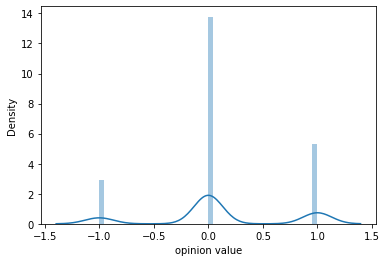

In [15]:
sns.distplot(sentiment_table['opinion value'])

<AxesSubplot:xlabel='opinion value', ylabel='count'>

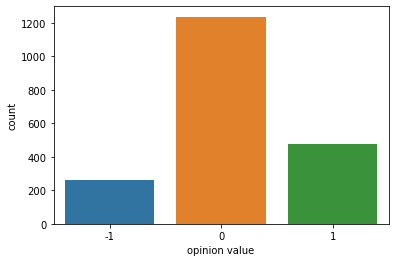

In [16]:
# 0 --neutral
# 1 --positive
# 0 --negative
sns.countplot(sentiment_table['opinion value'])

<AxesSubplot:xlabel='srno', ylabel='opinion value'>

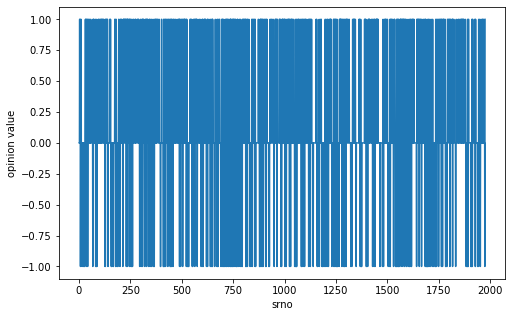

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(y='opinion value',x='srno',data=sentiment_table)

<AxesSubplot:xlabel='word count', ylabel='opinion value'>

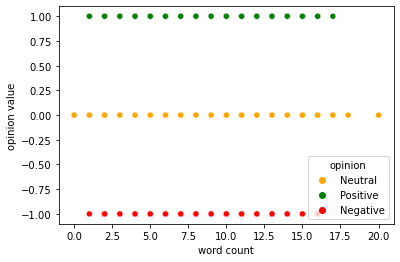

In [18]:
sns.scatterplot(x='word count',y='opinion value', hue='opinion', data=sentiment_table, palette=['orange','green','red'])